In [5]:
from google.colab import files
uploaded = files.upload()


Saving WELFake_Dataset.csv to WELFake_Dataset.csv


In [6]:
import pandas as pd
df = pd.read_csv("WELFake_Dataset.csv")
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
df.info()
df.columns
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


,count
label,
1,37106
0,35028


In [8]:
df.dropna(inplace=True)


In [9]:
df['content'] = df['title'] + ' ' + df['text']


In [10]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['content'] = df['content'].apply(clean_text)


In [11]:
X = df['content']
y = df['label']  # 0 = Real, 1 = Fake


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9457646072127481

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7081
           1       0.94      0.96      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



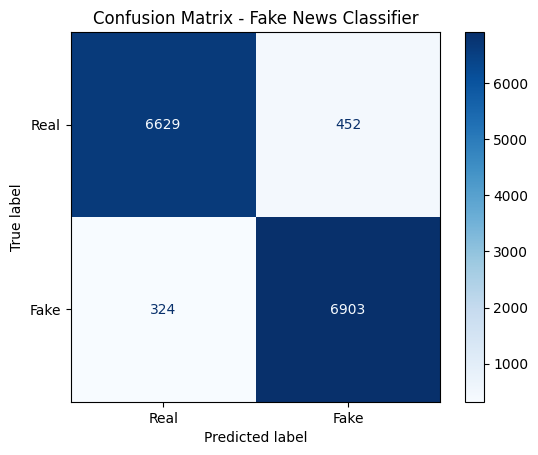

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Fake News Classifier")
plt.show()


In [16]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)
    return "Fake News" if pred[0] == 1 else "Real News"

predict_news("Breaking: Scientists discover new species in Antarctica.")


'Fake News'